In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy.stats as stats
import itertools 
import matplotlib.gridspec as gridspec
os.chdir('..')

plt.rcParams['font.size'] = 12
plt.rcParams['figure.dpi'] = 500

In [2]:
crab_sigma = pd.DataFrame()
for file in os.listdir('eval_results/conductivity/crabnet'):
    if 'Kfold' in file:
        df = pd.read_excel('eval_results/conductivity/crabnet/' + file)
        crab_sigma = pd.concat([crab_sigma, df])

crab_gap = pd.DataFrame()
for file in os.listdir('eval_results/bandgap/crabnet'):
    if 'Kfold' in file:
        df = pd.read_excel('eval_results/bandgap/crabnet/' + file)
        crab_gap = pd.concat([crab_gap, df])
    
rf_sigma = pd.DataFrame()
for file in os.listdir('eval_results/conductivity/rf'):
    if 'Kfold' in file:
        df = pd.read_excel('eval_results/conductivity/rf/' + file)
        rf_sigma = pd.concat([rf_sigma, df])

rf_gap = pd.DataFrame()
for file in os.listdir('eval_results/bandgap/rf'):
    if 'Kfold' in file:
        df = pd.read_excel('eval_results/bandgap/rf/' + file)
        rf_gap = pd.concat([rf_gap, df])

dop_sigma = pd.DataFrame()
for file in os.listdir('eval_results/conductivity/dopnet'):
    if 'Kfold' in file:
        df = pd.read_excel('eval_results/conductivity/dopnet/' + file)
        dop_sigma = pd.concat([dop_sigma, df])

dop_gap = pd.DataFrame()
for file in os.listdir('eval_results/bandgap/dopnet'):
    if 'Kfold' in file:
        df = pd.read_excel('eval_results/bandgap/dopnet/' + file)
        dop_gap = pd.concat([dop_gap, df])

crab_sigma.reset_index(drop=True, inplace=True) 
crab_gap.reset_index(drop=True, inplace=True)
rf_sigma.reset_index(drop=True, inplace=True)
rf_gap.reset_index(drop=True, inplace=True)
dop_sigma.reset_index(drop=True, inplace=True)
dop_gap.reset_index(drop=True, inplace=True)

In [4]:
#USEFUL FOR DEFINING SUBPLOTS IN SEABORN
class SeabornFig2Grid():
    def __init__(self, seaborngrid, fig,  subplot_spec):
        self.fig = fig
        self.sg = seaborngrid
        self.subplot = subplot_spec
        if isinstance(self.sg, sns.axisgrid.FacetGrid) or \
           isinstance(self.sg, sns.axisgrid.PairGrid):
            self._movegrid()
        elif isinstance(self.sg, sns.axisgrid.JointGrid):
            self._movejointgrid()
        self._finalize()

    def _movegrid(self):
        """ Move PairGrid or Facetgrid """
        self._resize()
        n = self.sg.axes.shape[0]
        m = self.sg.axes.shape[1]
        self.subgrid = gridspec.GridSpecFromSubplotSpec(n, m, subplot_spec=self.subplot)
        for i in range(n):
            for j in range(m):
                self._moveaxes(self.sg.axes[i, j], self.subgrid[i, j])

    def _movejointgrid(self):
        """ Move Jointgrid """
        h = self.sg.ax_joint.get_position().height
        h2 = self.sg.ax_marg_x.get_position().height
        r = int(np.round(h / h2))
        self._resize()
        self.subgrid = gridspec.GridSpecFromSubplotSpec(r + 1, r + 1, subplot_spec=self.subplot)

        self._moveaxes(self.sg.ax_joint, self.subgrid[1:, :-1])
        self._moveaxes(self.sg.ax_marg_x, self.subgrid[0, :-1])
        self._moveaxes(self.sg.ax_marg_y, self.subgrid[1:, -1])

    def _moveaxes(self, ax, gs):
        ax.remove()
        ax.figure = self.fig
        self.fig.axes.append(ax)
        self.fig.add_axes(ax)
        ax._subplotspec = gs
        ax.set_position(gs.get_position(self.fig))
        ax.set_subplotspec(gs)

    def _finalize(self):
        plt.close(self.sg.fig)
        self.fig.canvas.mpl_connect("resize_event", self._resize)
        self.fig.canvas.draw()

    def _resize(self, evt=None):
        self.sg.fig.set_size_inches(self.fig.get_size_inches())

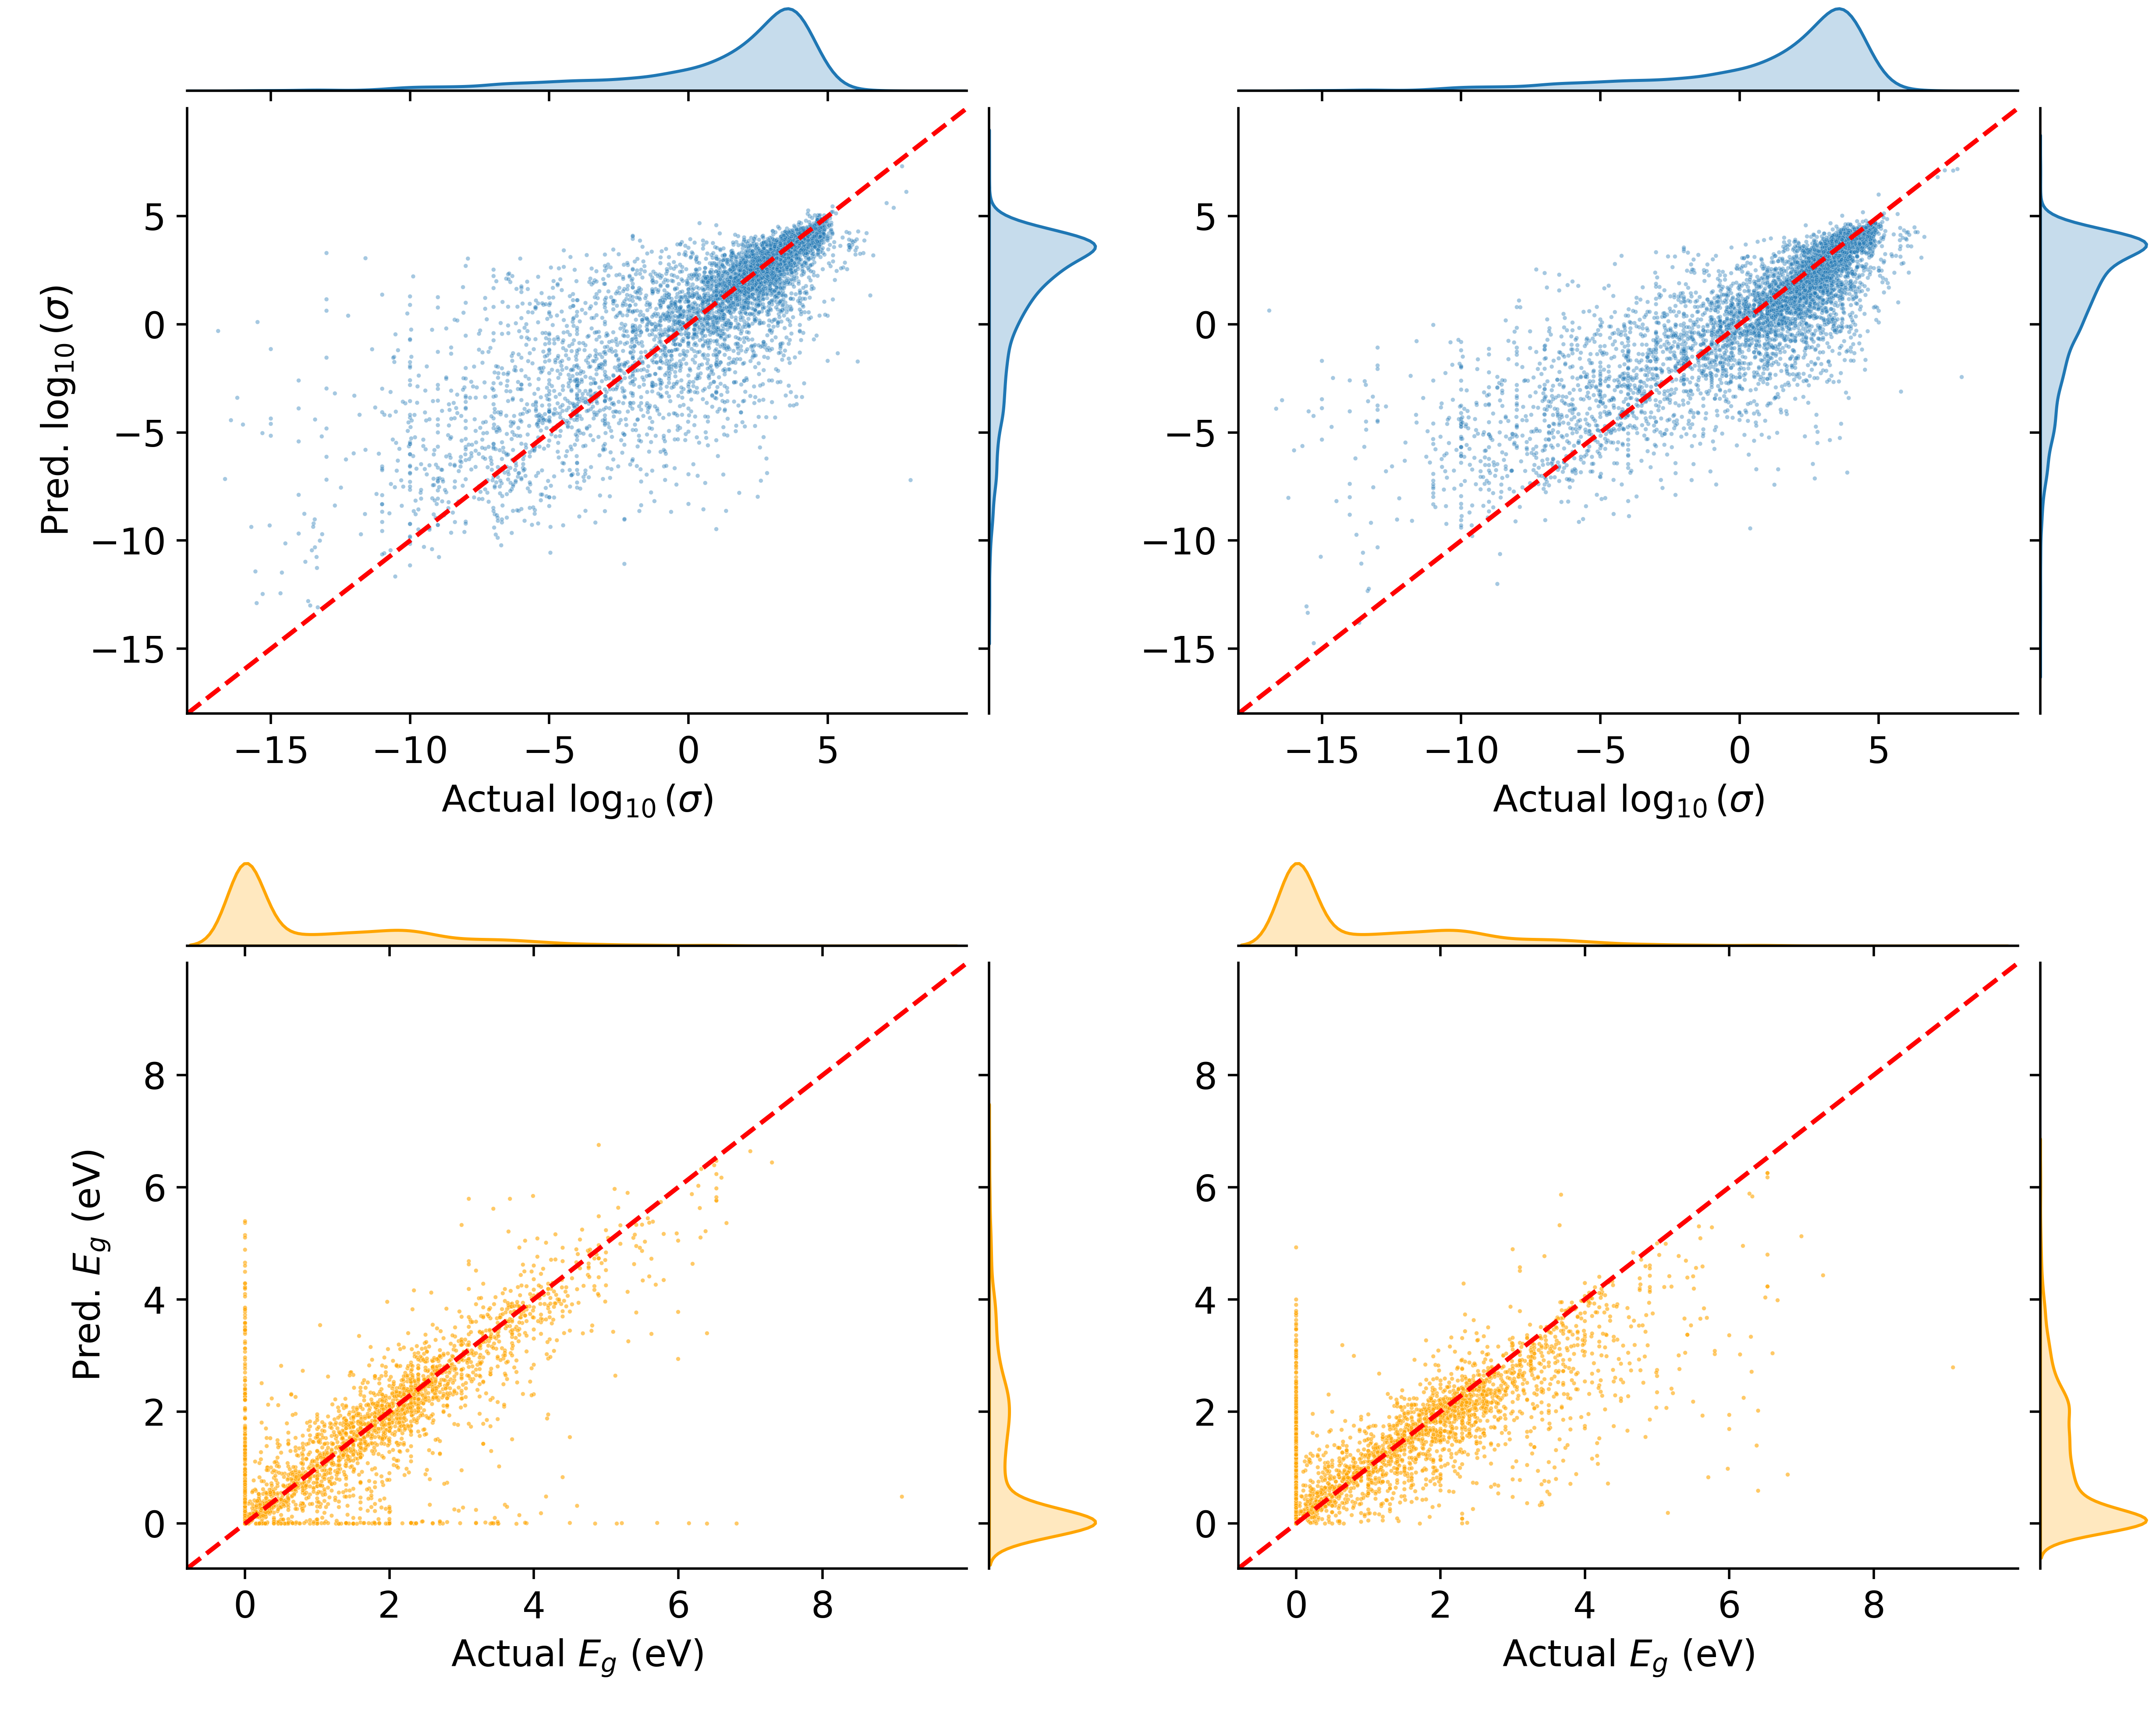

In [7]:
#Trick to have kde plots on margins, using hue on sns.jointplot
crab_sigma['null']= 'null'
crab_gap['null']  = 'null'

rf_sigma['null']  = 'null'
rf_gap['null']    = 'null'

dop_sigma['null'] = 'null'
dop_gap['null']   = 'null'

fig = plt.figure(figsize=(10, 8))
gs  = gridspec.GridSpec(2, 2)

g0 = sns.jointplot(data=crab_sigma, x='real', y='pred',s=2,alpha=0.4, hue='null',legend=False)
g1 = sns.jointplot(data=rf_sigma, x='real', y='pred',  s=2, alpha=0.4, hue='null',legend=False)
# g2 = sns.jointplot(data=dop_sigma, x='real', y='pred', s=2, alpha=0.4, hue='null',legend=False)

g2 = sns.jointplot(data=crab_gap, x='real',y='pred', s=2, alpha=0.6, hue='null', palette={'null':'orange'},legend=False)
g3 = sns.jointplot(data=rf_gap, x='real', y='pred', s=2,alpha=0.6, hue='null', palette={'null':'orange'}, legend=False)
# g5 = sns.jointplot(data=dop_gap, x='real', y='pred', s=2, alpha=0.6, hue='null', palette={'null':'orange'}, legend=False)

mg0 = SeabornFig2Grid(g0, fig, gs[0])
mg1 = SeabornFig2Grid(g1, fig, gs[1])
# mg2 = SeabornFig2Grid(g2, fig, gs[2])
mg2 = SeabornFig2Grid(g2, fig, gs[2])
mg3 = SeabornFig2Grid(g3, fig, gs[3])
# mg5 = SeabornFig2Grid(g5, fig, gs[5])

# Modify the properties of the axes

#G0
g0.ax_joint.axline((0, 0), slope=1, color='r', linestyle='--')
g0.ax_joint.set_xlabel('Actual $\log_{10}(\sigma)$')
g0.ax_joint.set_ylabel('Pred. $\log_{10}(\sigma)$')
g0.ax_joint.set_xticks(np.arange(-15, 10, 5))
g0.ax_joint.set_yticks(np.arange(-15, 10, 5))

g0.ax_joint.set_xlim(-18, 10)
g0.ax_joint.set_ylim(-18, 10)

g0.ax_marg_x.set_xticks(np.arange(-15, 10, 5))
g0.ax_marg_y.set_yticks(np.arange(-15, 10, 5))

g0.ax_marg_x.set_xlim(-18, 10)
g0.ax_marg_y.set_ylim(-18, 10)

g0.ax_marg_x.set_xticks(np.arange(-15, 10, 5))
g0.ax_marg_y.set_yticks(np.arange(-15, 10, 5))

g0.ax_marg_x.set_xlim(-18, 10)
g0.ax_marg_y.set_ylim(-18, 10)

g0.ax_joint.set_xlim(-18, 10)
g0.ax_joint.set_ylim(-18, 10)

#G1
g1.ax_joint.axline((0, 0), slope=1, color='r', linestyle='--')
g1.ax_joint.set_xlabel('Actual $\log_{10}(\sigma)$')
g1.ax_joint.set_ylabel('')
g1.ax_joint.set_xticks(np.arange(-15, 10, 5))
g1.ax_joint.set_yticks(np.arange(-15, 10, 5))

g1.ax_joint.set_xlim(-18, 10)
g1.ax_joint.set_ylim(-18, 10)

g1.ax_marg_x.set_xticks(np.arange(-15, 10, 5))
g1.ax_marg_y.set_yticks(np.arange(-15, 10, 5))

g1.ax_marg_x.set_xlim(-18, 10)
g1.ax_marg_y.set_ylim(-18, 10)

#G2
# g2.ax_joint.axline((0, 0), slope=1, color='r', linestyle='--')
# g2.ax_joint.set_xlabel('Actual $\log_{10}(\sigma)$')
# g2.ax_joint.set_ylabel('')

# g2.ax_joint.set_xticks(np.arange(-15, 10, 5))
# g2.ax_joint.set_yticks(np.arange(-15, 10, 5))

# g2.ax_joint.set_xlim(-18, 10)
# g2.ax_joint.set_ylim(-18, 10)

# g2.ax_marg_x.set_xticks(np.arange(-15, 10, 5))
# g2.ax_marg_y.set_yticks(np.arange(-15, 10, 5))

# g2.ax_marg_x.set_xlim(-18, 10)
# g2.ax_marg_y.set_ylim(-18, 10)

#G3
g2.ax_joint.set_xlabel('Actual $E_g$ (eV)')
g2.ax_joint.set_ylabel('Pred. $E_g$ (eV)', labelpad=10)
g2.ax_joint.axline((0, 0), slope=1, color='r', linestyle='--')

g2.ax_joint.set_xticks(np.arange(0, 10, 2))
g2.ax_joint.set_xlim(-0.8, 10)

g2.ax_marg_x.set_xticks(np.arange(0, 10, 2))
g2.ax_marg_x.set_xlim(-0.8, 10)

g2.ax_joint.set_ylim(-0.8,10)

g2.ax_marg_y.set_yticks(np.arange(0, 10, 2))
g2.ax_marg_y.set_ylim(-0.8,10)

#G4
g3.ax_joint.set_xlabel('Actual $E_g$ (eV)')
g3.ax_joint.set_ylabel('')
g3.ax_joint.axline((0, 0), slope=1, color='r', linestyle='--')
g3.ax_joint.set_xticks(np.arange(0, 10, 2))
g3.ax_joint.set_xlim(-0.8, 10)

g3.ax_marg_x.set_xticks(np.arange(0, 10, 2))
g3.ax_marg_x.set_xlim(-0.8, 10)

g3.ax_joint.set_ylim(-0.8,10)

g3.ax_marg_y.set_yticks(np.arange(0, 10, 2))
g3.ax_marg_y.set_ylim(-0.8,10)

#G5
# g5.ax_joint.set_xlabel('Actual $E_g$ (eV)')
# g5.ax_joint.set_ylabel('')
# g5.ax_joint.axline((0, 0), slope=1, color='r', linestyle='--')
# g5.ax_joint.set_xticks(np.arange(0, 10, 2))
# g5.ax_joint.set_xlim(-0.8, 10)

# g5.ax_marg_x.set_xticks(np.arange(0, 10, 2))
# g5.ax_marg_x.set_xlim(-0.8, 10)

# g5.ax_joint.set_ylim(-0.8,10)

# g5.ax_marg_y.set_yticks(np.arange(0, 10, 2))
# g5.ax_marg_y.set_ylim(-0.8,10)

gs.tight_layout(fig)
plt.show()

In [2]:
#LOCO-CV Analysis
crab_sigma = pd.DataFrame()
for file in os.listdir('eval_results/conductivity/crabnet'):
    if 'LOCO' in file:
        df = pd.read_excel('eval_results/conductivity/crabnet/' + file)
        df['cluster'] = file.split('_')[1].split('.')[0]
        crab_sigma = pd.concat([crab_sigma, df])

crab_gap = pd.DataFrame()
for file in os.listdir('eval_results/bandgap/crabnet'):
    if 'LOCO' in file:
        df = pd.read_excel('eval_results/bandgap/crabnet/' + file)
        df['cluster'] = file.split('_')[1].split('.')[0]
        crab_gap = pd.concat([crab_gap, df])
    
rf_sigma = pd.DataFrame()
for file in os.listdir('eval_results/conductivity/rf'):
    if 'LOCO' in file:
        df = pd.read_excel('eval_results/conductivity/rf/' + file)
        df['cluster'] = file.split('_')[1].split('.')[0]
        rf_sigma = pd.concat([rf_sigma, df])

rf_gap = pd.DataFrame()
for file in os.listdir('eval_results/bandgap/rf'):
    if 'LOCO' in file:
        df = pd.read_excel('eval_results/bandgap/rf/' + file)
        df['cluster'] = file.split('_')[1].split('.')[0]
        rf_gap = pd.concat([rf_gap, df])

# dop_sigma = pd.DataFrame()
# for file in os.listdir('eval_results/conductivity/dopnet'):
#     if 'LOCO' in file:
#         df = pd.read_excel('eval_results/conductivity/dopnet/' + file)
#         df['cluster'] = file.split('_')[1].split('.')[0]
#         dop_sigma = pd.concat([dop_sigma, df])

# dop_gap = pd.DataFrame()
# for file in os.listdir('eval_results/bandgap/dopnet'):
#     if 'LOCO' in file:
#         df = pd.read_excel('eval_results/bandgap/dopnet/' + file)
#         df['cluster'] = file.split('_')[1].split('.')[0]
#         dop_gap = pd.concat([dop_gap, df])

crab_sigma.reset_index(drop=True, inplace=True) 
crab_gap.reset_index(drop=True, inplace=True)
rf_sigma.reset_index(drop=True, inplace=True)
rf_gap.reset_index(drop=True, inplace=True)
# dop_sigma.reset_index(drop=True, inplace=True)
# dop_gap.reset_index(drop=True, inplace=True)

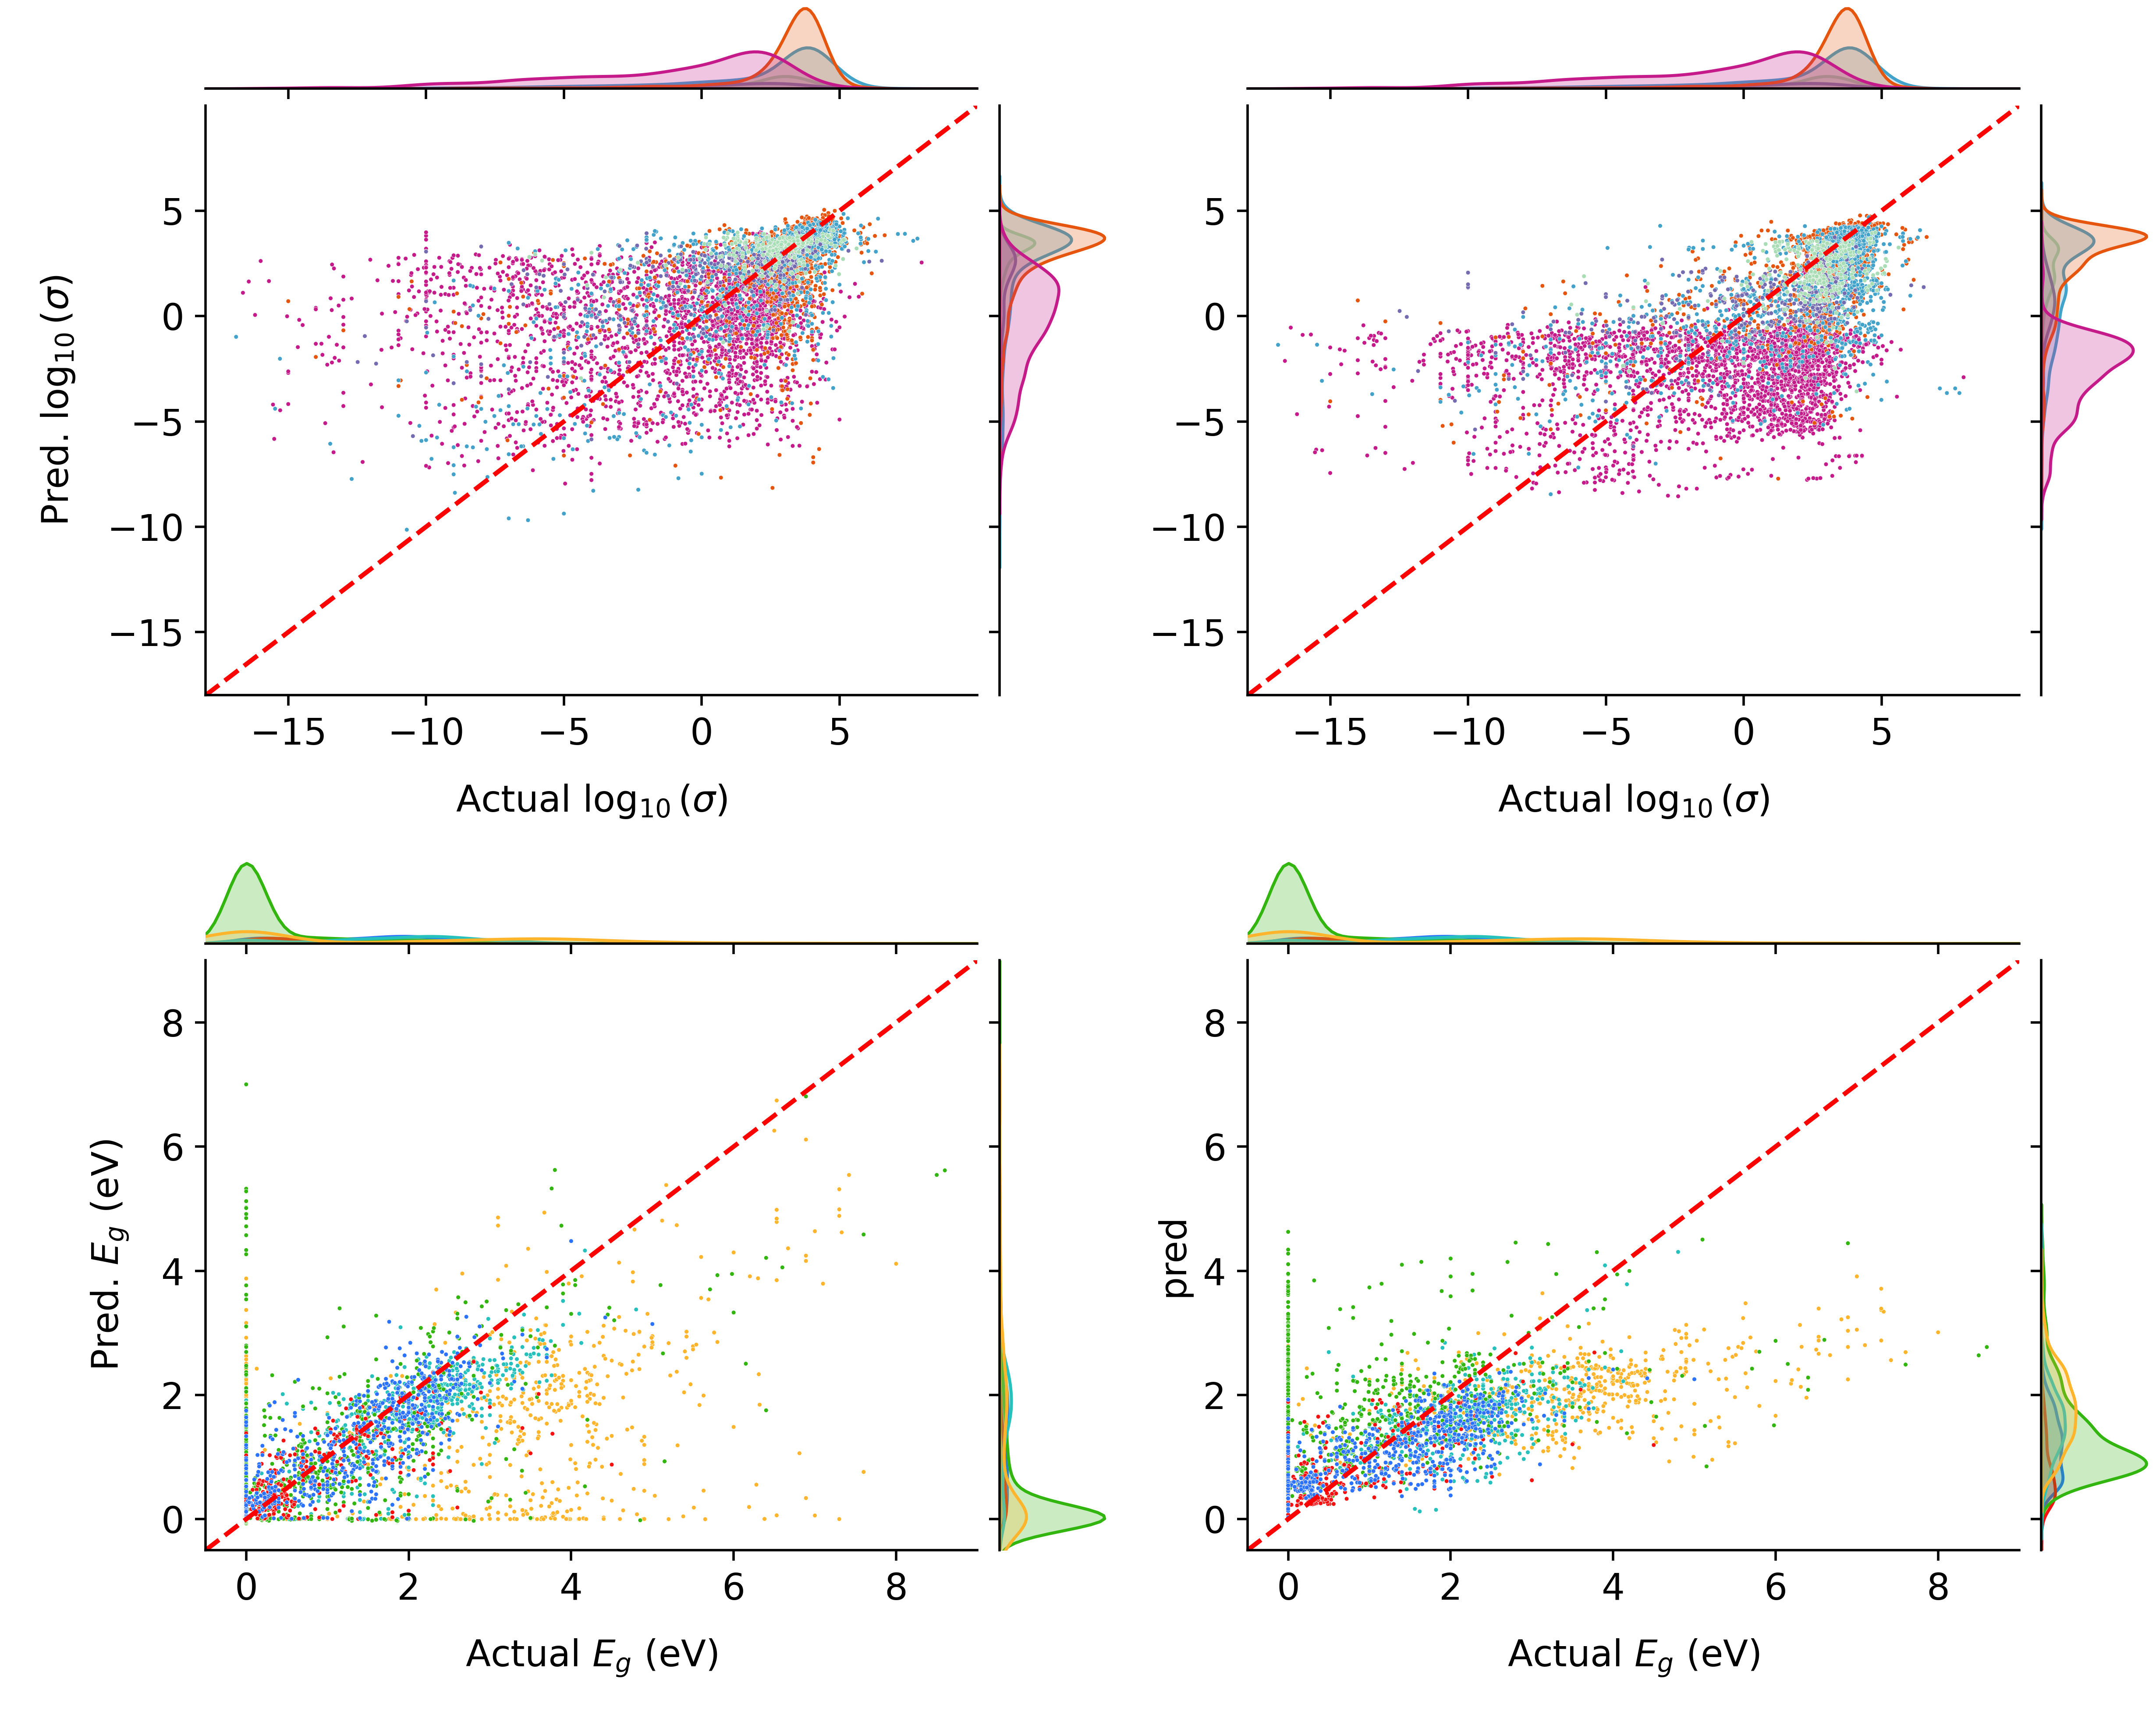

In [14]:
#Plotting LOCO ANALYSIS
fig = plt.figure(figsize=(10, 8))
gs  = gridspec.GridSpec(2, 2)

palette_sigma = {
                 '0':'#756bb1',
                 '1':'#c51b8a',
                 '2':'#e6550d',
                 '3':'#43a2ca',
                 '4':'#a8ddb5'
                 }

palette_gap = {'0':'#f71010',
               '1':'#ffb52b',
               '2':'#27c1bd',
               '3':'#32b60f',
               '4':'#2b72ff'}

g0 = sns.jointplot(data=crab_sigma, x='real', y='pred',s=2, hue='cluster',
                   palette=palette_sigma,
                   legend=False)

g1 = sns.jointplot(data=rf_sigma, x='real', y='pred',s=2, hue='cluster',
                   palette=palette_sigma,
                   legend=False)

# g2 = sns.jointplot(data=dop_sigma, x='real', y='pred',s=2, hue='cluster',
#                    palette={'0':'#e6550d',
#                             '1':'#756bb1',
#                             '2':'#c51b8a',
#                             '3':'#a8ddb5',
#                             '4':'#43a2ca'},
#                    legend=False)

g2 = sns.jointplot(data=crab_gap, x='real',y='pred', s=2, hue='cluster', 
                   palette=palette_gap,
                   legend=False)

g3 = sns.jointplot(data=rf_gap, x='real',y='pred', s=2, hue='cluster', 
                   palette=palette_gap,
                   legend=False)

# g5 = sns.jointplot(data=dop_gap, x='real',y='pred', s=2, hue='cluster', 
#                    palette={'0':'#f71010',
#                             '1':'#32b60f',
#                             '2':'#27c1bd',
#                             '3':'#2b72ff',
#                             '4':'#ffb52b'},
#                    legend=False)

mg0 = SeabornFig2Grid(g0, fig, gs[0])
mg1 = SeabornFig2Grid(g1, fig, gs[1])
mg2 = SeabornFig2Grid(g2, fig, gs[2])
mg3 = SeabornFig2Grid(g3, fig, gs[3])
# mg4 = SeabornFig2Grid(g4, fig, gs[4])
# mg5 = SeabornFig2Grid(g5, fig, gs[5])

#G0
g0.ax_joint.axline((0, 0), slope=1, color='r', linestyle='--')
g0.ax_joint.set_xlabel('Actual $\log_{10}(\sigma)$', labelpad=10)
g0.ax_joint.set_ylabel('Pred. $\log_{10}(\sigma)$', labelpad=10)

g0.ax_joint.set_xticks(np.arange(-15, 10, 5))
g0.ax_joint.set_xlim(-18, 10)
g0.ax_marg_x.set_xticks(np.arange(-15, 10, 5))
g0.ax_marg_x.set_xlim(-18, 10)

g0.ax_joint.set_yticks(np.arange(-15, 10, 5))
g0.ax_joint.set_ylim(-18, 10)
g0.ax_marg_y.set_yticks(np.arange(-15, 10, 5))
g0.ax_marg_y.set_ylim(-18, 10)

#G1
g1.ax_joint.axline((0, 0), slope=1, color='r', linestyle='--')
g1.ax_joint.set_xlabel('Actual $\log_{10}(\sigma)$', labelpad=10)
g1.ax_joint.set_ylabel('', labelpad=10)

g1.ax_joint.set_xticks(np.arange(-15, 10, 5))
g1.ax_joint.set_xlim(-18, 10)
g1.ax_marg_x.set_xticks(np.arange(-15, 10, 5))
g1.ax_marg_x.set_xlim(-18, 10)

g1.ax_joint.set_yticks(np.arange(-15, 10, 5))
g1.ax_joint.set_ylim(-18, 10)
g1.ax_marg_y.set_yticks(np.arange(-15, 10, 5))
g1.ax_marg_y.set_ylim(-18, 10)

#G2
g2.ax_joint.axline((0, 0), slope=1, color='r', linestyle='--')
g2.ax_joint.set_xlabel('Actual $E_g$ (eV)', labelpad=10)
g2.ax_joint.set_ylabel('Pred. $E_g$ (eV)', labelpad=10)

g2.ax_joint.set_xticks(np.arange(0, 10, 2))
g2.ax_joint.set_xlim(-0.5, 9)
g2.ax_marg_x.set_xticks(np.arange(0, 10, 2))
g2.ax_marg_x.set_xlim(-0.5, 9)

g2.ax_joint.set_yticks(np.arange(0, 10, 2))
g2.ax_joint.set_ylim(-0.5, 9)
g2.ax_marg_y.set_yticks(np.arange(0, 10, 2))
g2.ax_marg_y.set_ylim(-0.5, 9)

#G3
g3.ax_joint.axline((0, 0), slope=1, color='r', linestyle='--')
g3.ax_joint.set_xlabel('Actual $E_g$ (eV)', labelpad=10)

g3.ax_joint.set_xticks(np.arange(0, 10, 2))
g3.ax_joint.set_xlim(-0.5, 9)
g3.ax_marg_x.set_xticks(np.arange(0, 10, 2))
g3.ax_marg_x.set_xlim(-0.5, 9)

g3.ax_joint.set_yticks(np.arange(0, 10, 2))
g3.ax_joint.set_ylim(-0.5, 9)
g3.ax_marg_y.set_yticks(np.arange(0, 10, 2))
g3.ax_marg_y.set_ylim(-0.5, 9)

#G
# g4.ax_joint.axline((0, 0), slope=1, color='r', linestyle='--')
# g4.ax_joint.set_xlabel('Actual $E_g$ (eV)', labelpad=10)
# g4.ax_joint.set_ylabel('', labelpad=10)

# g4.ax_joint.set_xticks(np.arange(0, 10, 2))
# g4.ax_joint.set_xlim(-0.5, 9)
# g4.ax_marg_x.set_xticks(np.arange(0, 10, 2))
# g4.ax_marg_x.set_xlim(-0.5, 9)

# g4.ax_joint.set_yticks(np.arange(0, 10, 2))
# g4.ax_joint.set_ylim(-0.5, 9)
# g4.ax_marg_y.set_yticks(np.arange(0, 10, 2))
# g4.ax_marg_y.set_ylim(-0.5, 9)

# #G5
# g5.ax_joint.axline((0, 0), slope=1, color='r', linestyle='--')
# g5.ax_joint.set_xlabel('Actual $E_g$ (eV)', labelpad=10)
# g5.ax_joint.set_ylabel('', labelpad=10)

# g5.ax_joint.set_xticks(np.arange(0, 10, 2))
# g5.ax_joint.set_xlim(-0.5, 9)
# g5.ax_marg_x.set_xticks(np.arange(0, 10, 2))
# g5.ax_marg_x.set_xlim(-0.5, 9)

# g5.ax_joint.set_yticks(np.arange(0, 10, 2))
# g5.ax_joint.set_ylim(-0.5, 9)
# g5.ax_marg_y.set_yticks(np.arange(0, 10, 2))
# g5.ax_marg_y.set_ylim(-0.5, 9)

gs.tight_layout(fig)
plt.show()

## Studying element prevalence of clusters

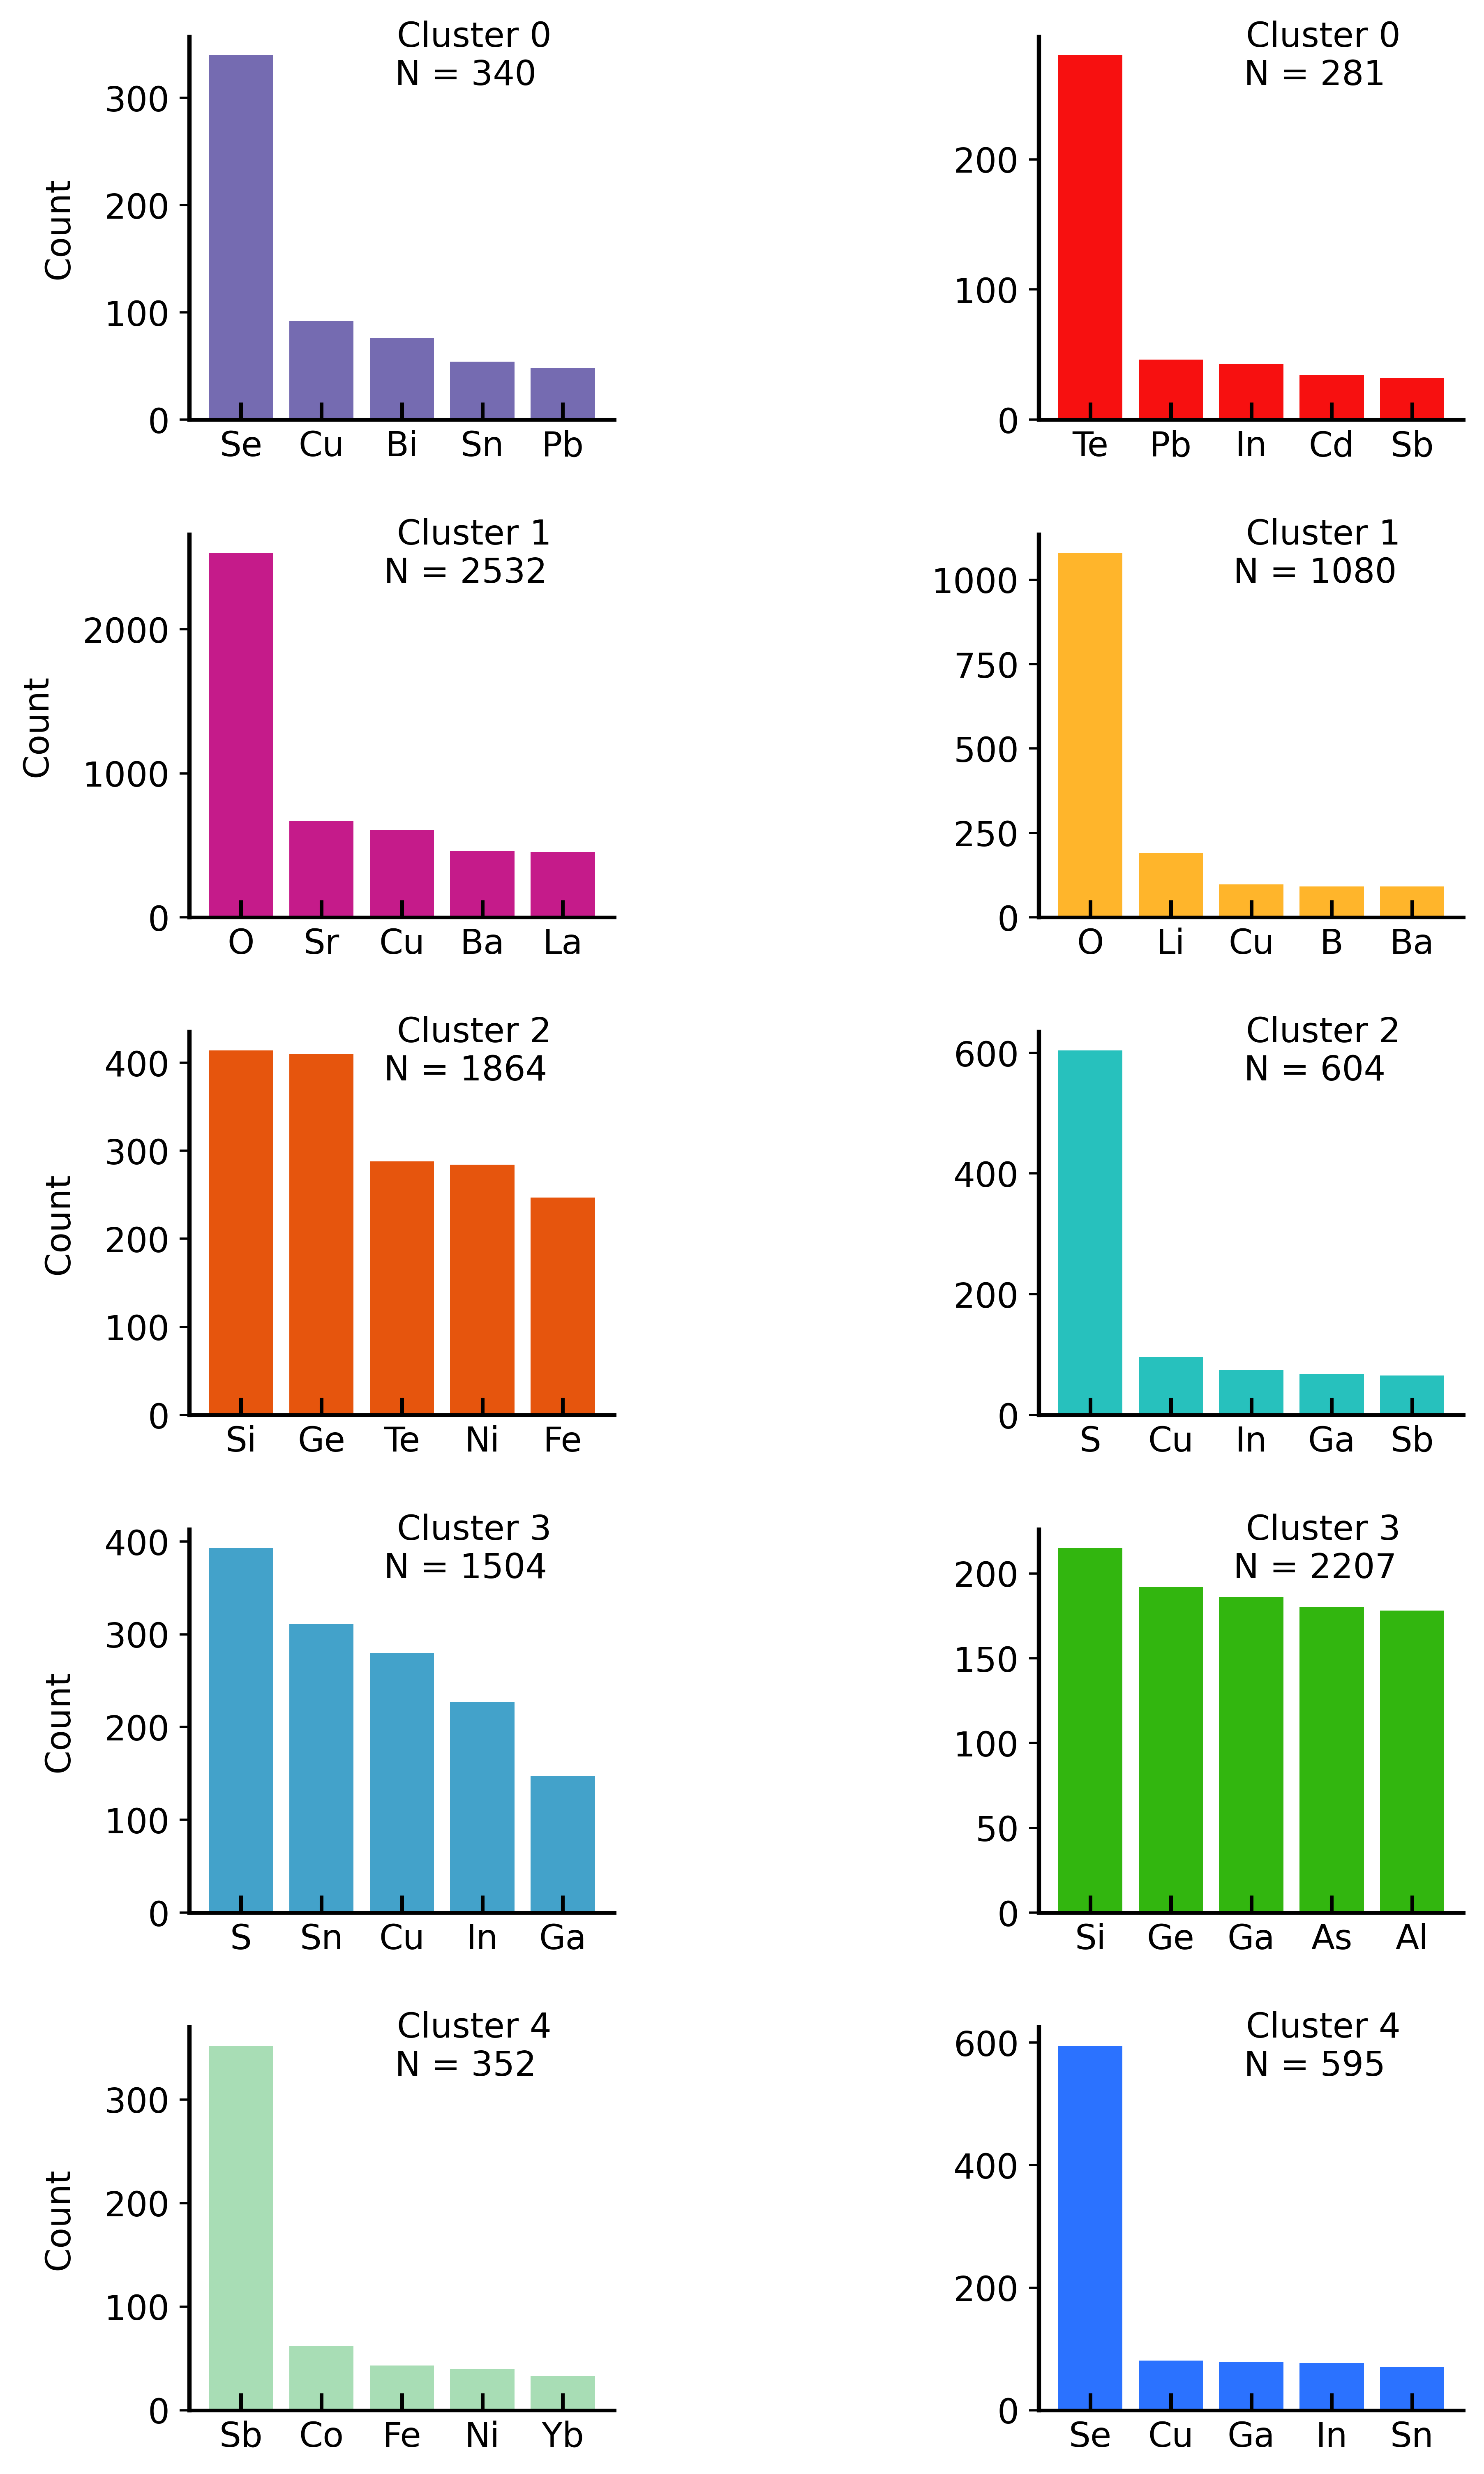

In [18]:
from common.chem import _element_composition_L
all_elems = pd.read_csv('data_modules/element_properties/mat2vec.csv',index_col=0).index.tolist()
elems_dict = dict.fromkeys(all_elems,0)
def plot_elem_hist(df, ax, color='blue', ylabel=True, cluster_id='0'):
    elems_dict = dict.fromkeys(all_elems,0)
    for formula in df['composition']:
        elems, _ = _element_composition_L(formula)
        for el in elems:
            if el in elems:
                elems_dict[el] += 1
    
    #sorting dictionary
    elems_dict = dict(sorted(elems_dict.items(), key=lambda item: item[1], reverse=True))
    
    #taking top 5 elements
    elems_dict = dict(itertools.islice(elems_dict.items(), 5))
    ax.bar(elems_dict.keys(), elems_dict.values(), color=color)

    #annotating len(df) on top of plot

    ax.annotate(f'N = {len(df)}', xy=(0.65, 0.9), xycoords='axes fraction', fontsize=12, ha='center', va='center')

    #Annotating cluster id
    ax.annotate(f'Cluster {cluster_id}', xy=(0.67, 1.0), xycoords='axes fraction', fontsize=12, ha='center', va='center')

    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.3)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    if ylabel:
        ax.set_ylabel('Count', labelpad=10)
    ax.xaxis.set_tick_params(direction='in', width=1.3, length=6)

cluster_0_sigma = crab_sigma[crab_sigma['cluster'] == '0']
cluster_1_sigma = crab_sigma[crab_sigma['cluster'] == '1']
cluster_2_sigma = crab_sigma[crab_sigma['cluster'] == '2']
cluster_3_sigma = crab_sigma[crab_sigma['cluster'] == '3']
cluster_4_sigma = crab_sigma[crab_sigma['cluster'] == '4']

cluster_0_gap = crab_gap[crab_gap['cluster'] == '0']
cluster_1_gap = crab_gap[crab_gap['cluster'] == '1']
cluster_2_gap = crab_gap[crab_gap['cluster'] == '2']
cluster_3_gap = crab_gap[crab_gap['cluster'] == '3']
cluster_4_gap = crab_gap[crab_gap['cluster'] == '4']

fig, axs = plt.subplots(5, 2, figsize=(8, 15))
plot_elem_hist(cluster_0_sigma, axs[0,0],color=palette_sigma['0'], cluster_id='0')
plot_elem_hist(cluster_1_sigma, axs[1,0], color=palette_sigma['1'],cluster_id='1')
plot_elem_hist(cluster_2_sigma, axs[2,0], color=palette_sigma['2'],cluster_id='2')
plot_elem_hist(cluster_3_sigma, axs[3,0], color=palette_sigma['3'], cluster_id='3')
plot_elem_hist(cluster_4_sigma, axs[4,0], color=palette_sigma['4'], cluster_id='4')

plot_elem_hist(cluster_0_gap, axs[0,1], color=palette_gap['0'],ylabel=False, cluster_id='0')
plot_elem_hist(cluster_1_gap, axs[1,1], color=palette_gap['1'],ylabel=False, cluster_id='1')
plot_elem_hist(cluster_2_gap, axs[2,1], color=palette_gap['2'],ylabel=False, cluster_id='2')
plot_elem_hist(cluster_3_gap, axs[3,1], color=palette_gap['3'],ylabel=False, cluster_id='3')
plot_elem_hist(cluster_4_gap, axs[4,1], color=palette_gap['4'],ylabel=False, cluster_id='4')

plt.subplots_adjust(wspace=1., hspace=0.3)
